### Decision Tree with python
#### IRis data set

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

##### Loading Data set

In [57]:
from sklearn.datasets import load_iris # data set already exsist in sklearn

In [58]:
data = load_iris()
print(type(data))

<class 'sklearn.utils.Bunch'>


#### Availabel key in data set

In [59]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [60]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

##### IMportant note from above description is the attributes info, class info and corelations
###### Data will be fetched from 'data' key of the iris data set and column will be features name

In [61]:
df =  pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [62]:
# Getting corelations 
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

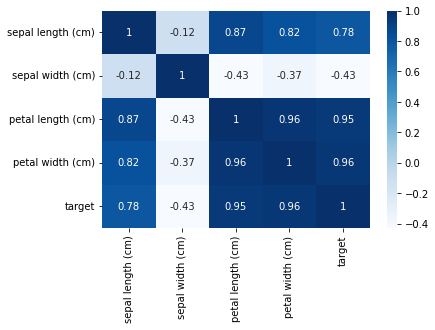

In [63]:
sns.heatmap(df.corr(),annot=True,cmap='Blues') 

###### It can be observed that target is very closely related with peatal width and petal length . The same was also mentioned in the description

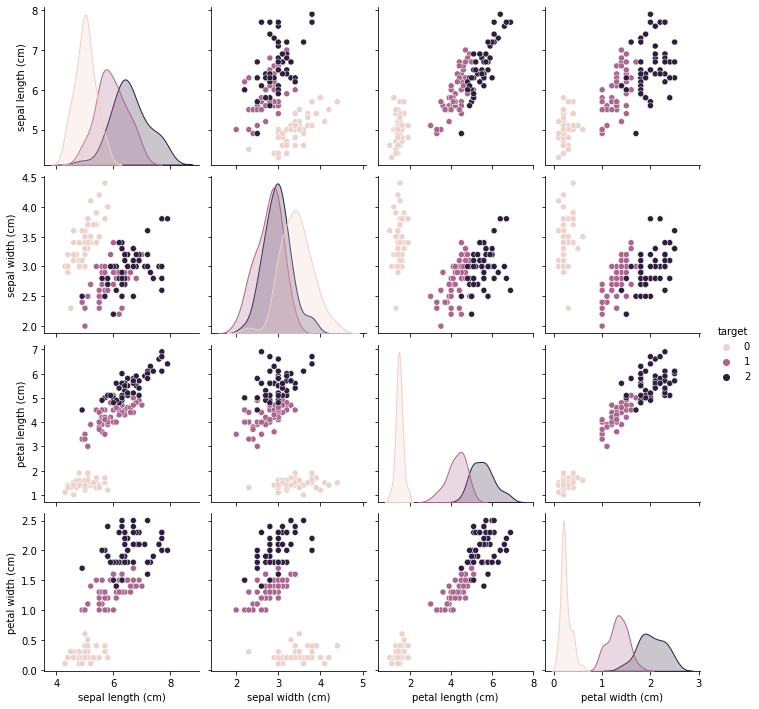

In [64]:
sns.pairplot(df,hue='target')

##### Splitting data from training and testing

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
x = df.drop(['target'],axis=1) #inputs all columns except target columns
y = df['target']                # target is output variable

In [67]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

### Decision tree classifier init, Trainin and predictions


In [68]:
#decision tree classified is from the tree family
from sklearn.tree import DecisionTreeClassifier

In [69]:
# The estimator support both the criteria, entropy as well gini impuritiy, any one of the two can be
#max_depth refers to the level in tree
model  = DecisionTreeClassifier(max_depth=6,random_state=0,criterion='entropy')
# model = DecisionTreeClassifier(max_depth=6,random_state=0,criterion='gini')

In [70]:
model.fit(x_train,y_train) #training model


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [71]:
predictions = model.predict(x_test) #passing output values for corresponding test data

#### Creating data frame roughly compare actual outputs and predicted outputs

In [72]:
compare = pd.DataFrame({"acutal":y_test,"prdicted":predictions})

In [73]:
compare

,acutal,prdicted
33,0,0
16,0,0
43,0,0
129,2,1
50,1,1
123,2,2
68,1,1
53,1,1
146,2,2
1,0,0


### MOdel Evaluation

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# VIsualising decision tree

In [76]:
from sklearn import tree


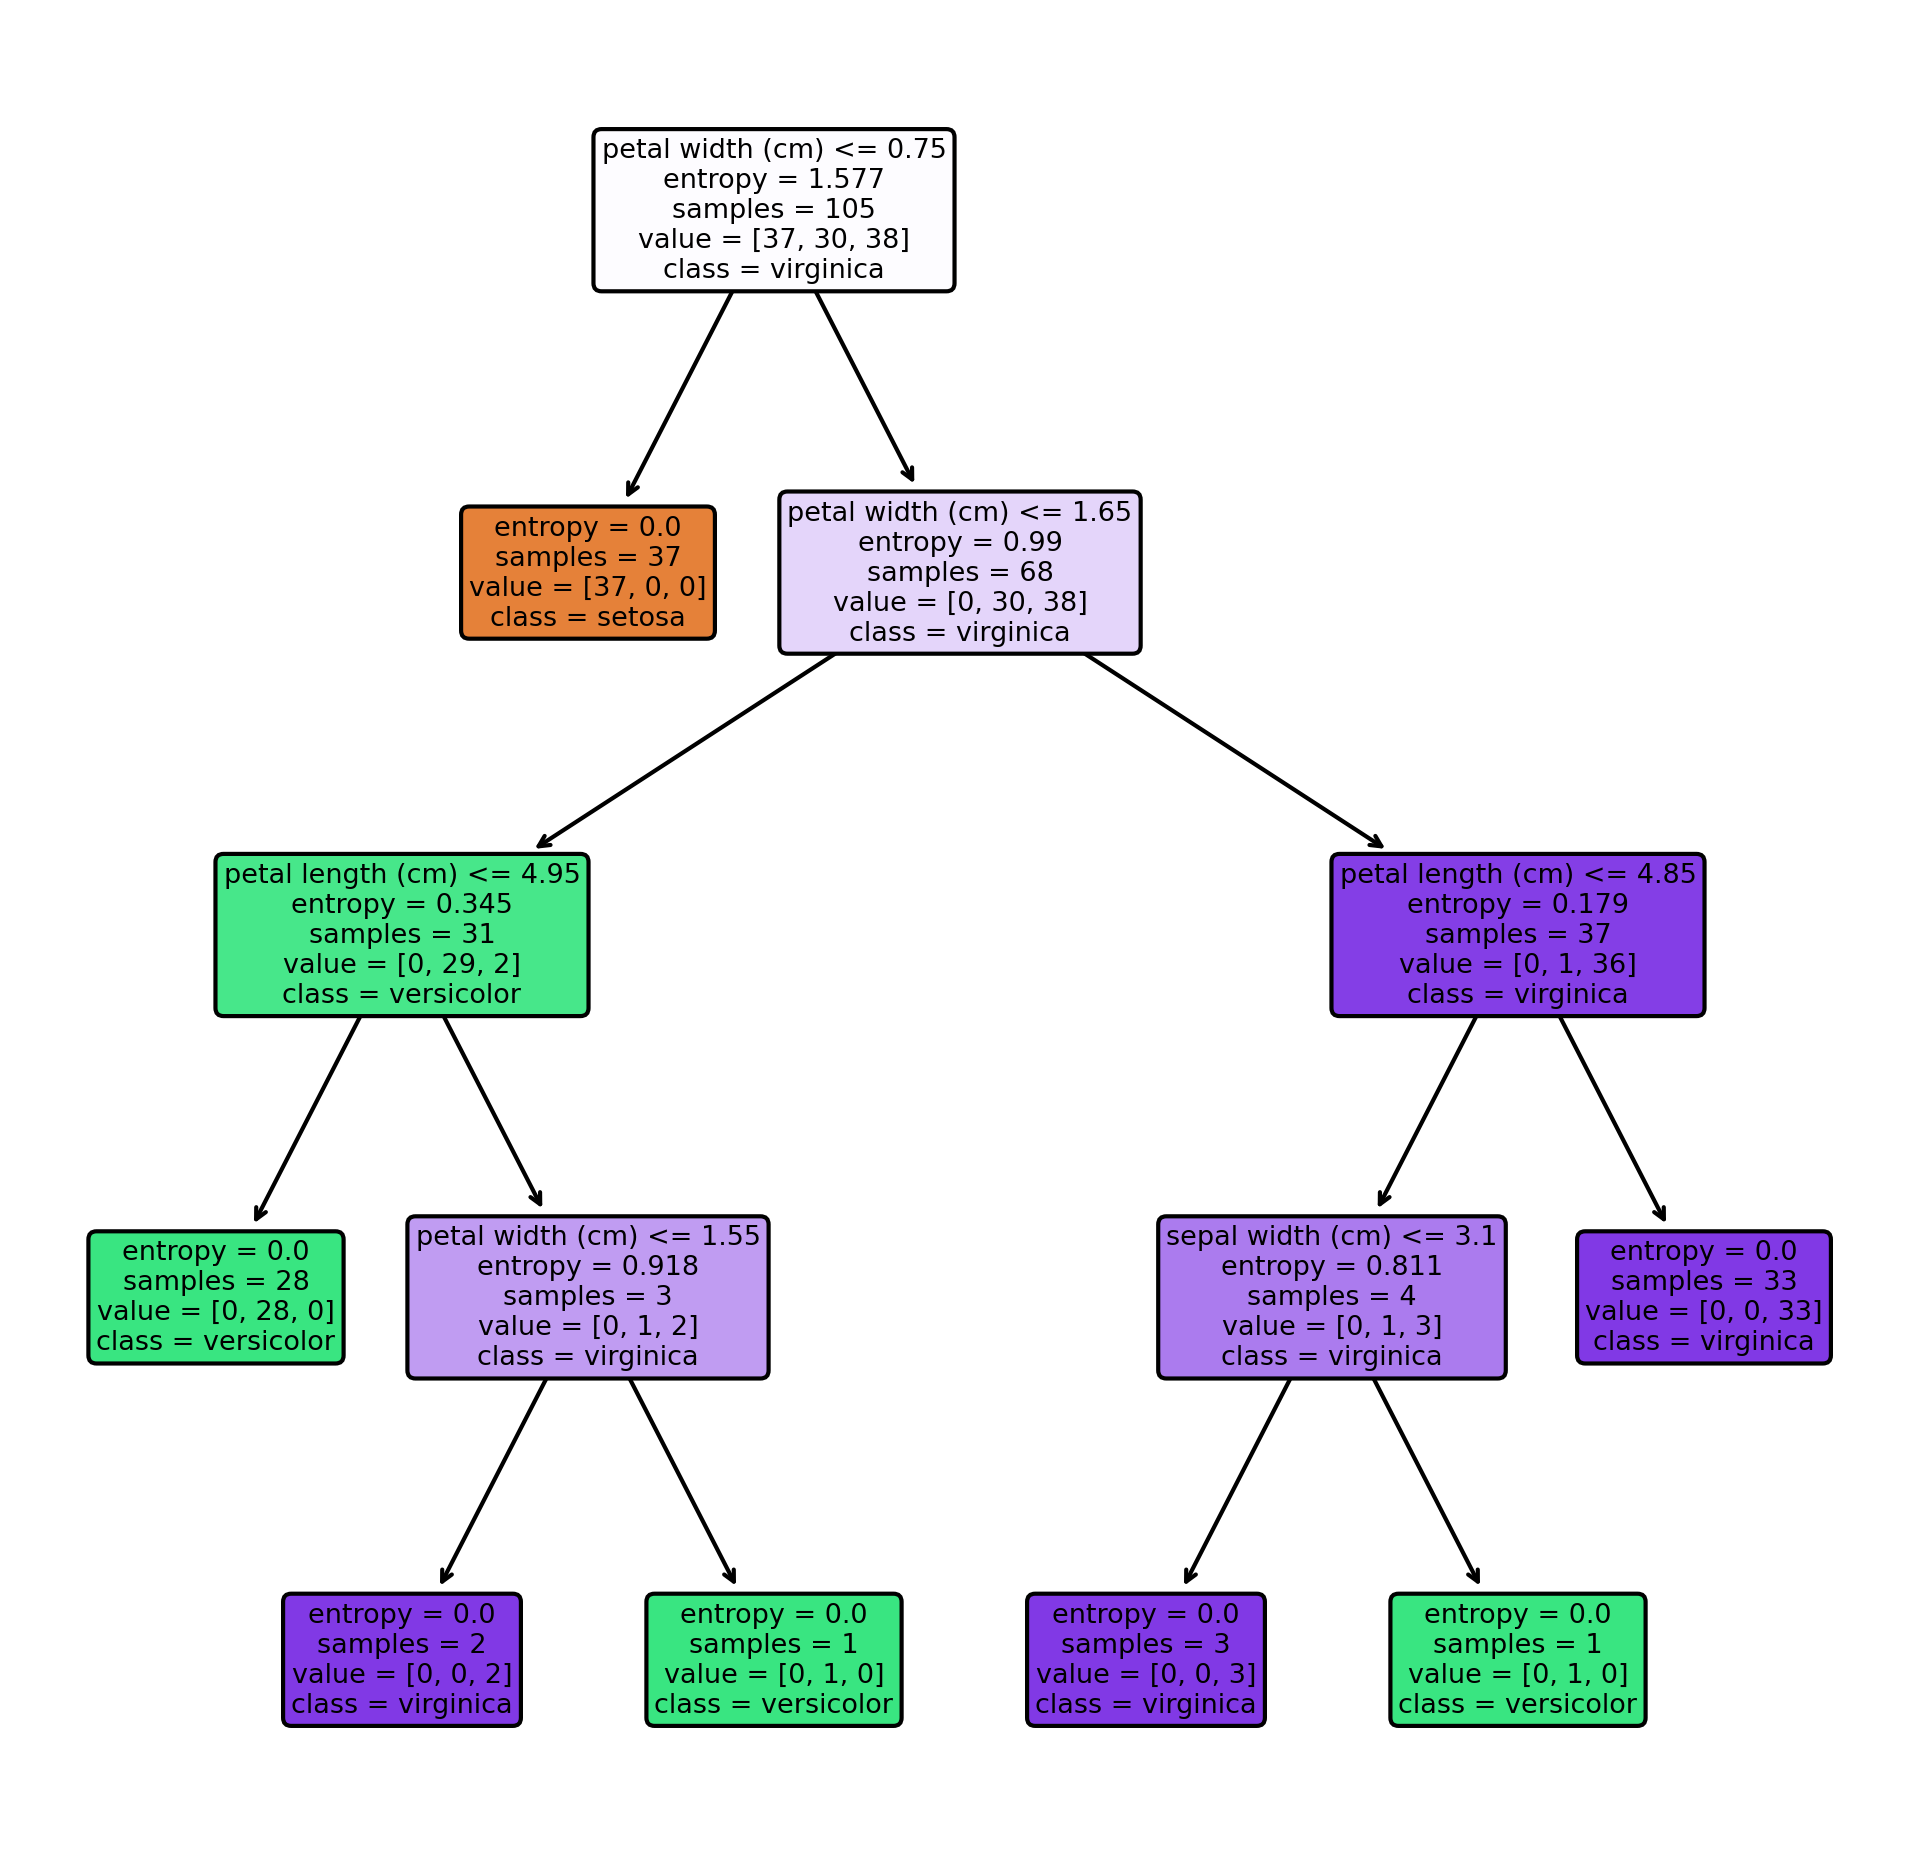

In [80]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize = (8,8),dpi=300)
tree.plot_tree(model,feature_names=data['feature_names'],class_names=data['target_names'],filled=True,rounded=True)
fig.savefig('Nmes.png')